In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
%matplotlib notebook
import scipy.stats as stats
import gensim

C:\Users\Pippo\Anaconda2\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
import pickle

## cargar data y limpiar data

In [2]:
data = pd.read_csv("C:/Users/Pippo/Documents/bbnoticias.csv",
                   encoding="utf-8", sep=",", parse_dates=['date'], dayfirst=True, index_col='date')

In [3]:
data.head()

,href,href-href,visitas,tagas,titulo,cat
date,,,,,,
2017-10-16 17:52:00,16/10/2017 17:52\n Corea del Norte ...,http://www.biobiochile.cl/noticias/internacion...,515.0,#Corea del Norte#Donald Trump#Kim Jong-Un#prog...,Corea del Norte no negociará si EEUU mantiene ...,noticias/internacional
2017-10-24 21:08:00,24/10/2017 21:08\n Corte de Concepc...,http://www.biobiochile.cl/noticias/nacional/re...,4713.0,#Concepción#Emilio Berkhoff#libertad condicion...,Corte de Concepción otorga libertad condiciona...,noticias/nacional
2017-10-13 12:26:00,13/10/2017 12:26\n Emiten alerta de...,http://www.biobiochile.cl/noticias/economia/tu...,18073.0,#Alerta#alerta de seguridad#niños#peligro#plat...,Emiten alerta de seguridad por falla en platos...,noticias/economia
2017-10-26 09:24:00,26/10/2017 09:24\n Uno menos para e...,http://www.biobiochile.cl/noticias/deportes/fu...,7679.0,#Clásico universitario#Fútbol#Jean Beausejour#...,Uno menos para el clásico: Beausejour sufre ed...,noticias/deportes
2017-10-24 09:41:00,24/10/2017 09:41\n Quillota: Detien...,http://www.biobiochile.cl/noticias/nacional/re...,369.0,#Detención#Disparo#Muerte#Presunto autor#Quill...,Quillota: Detienen a presunto autor de disparo...,noticias/nacional


<IPython.core.display.Javascript object>


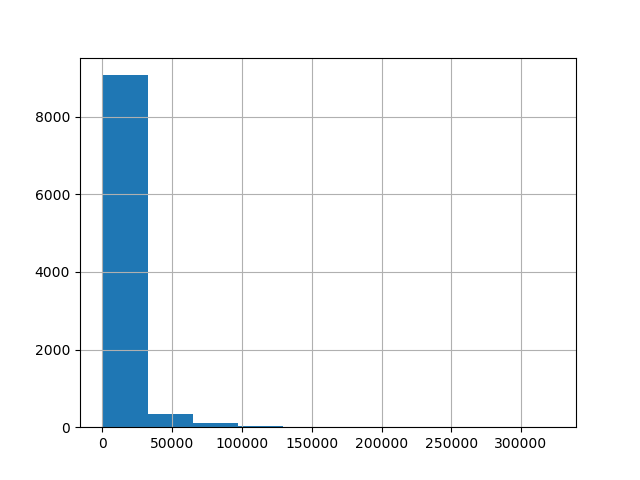

In [4]:
data['visitas'].hist()

In [5]:
complemento = pd.read_csv("C:/Users/Pippo/Documents/bbnotros.csv", encoding="utf-8", sep=",")

In [6]:
complemento.head()

,titulo,visitas,date,href
0,Estudio revela que matrimonios felices tienen ...,9634,10-10-2017 11:26,http://www.biobiochile.cl/noticias/mujer/parej...
1,Chockers de mezclilla: la nueva moda que usa T...,2979,18-10-2017 11:32#11:56,http://www.biobiochile.cl/noticias/mujer/moda-...
2,Lauren Hutton: la modelo más madura que ha pro...,3558,06-10-2017 22:32,http://www.biobiochile.cl/noticias/mujer/poder...
3,5 tendencias de la próxima temporada que vatic...,3476,03-10-2017 14:58,http://www.biobiochile.cl/noticias/mujer/moda-...
4,Pijama Chic: el estilo que Selena Gomez no qui...,11805,18-10-2017 16:54,http://www.biobiochile.cl/noticias/mujer/moda-...


In [7]:
data.drop_duplicates(['href-href'], inplace=True)
complemento.drop_duplicates(['href'], inplace=True)

In [8]:
data.loc[data['href-href'].isin(complemento['href']), ['visitas', 'titulo']] = complemento.loc[complemento['href'].isin(data['href-href']), ['visitas', 'titulo']].values

In [9]:
len(data['visitas'])

9939

In [10]:
len(data['visitas'][pd.isnull(data['visitas'])==True])

31

In [11]:
data.head()

,href,href-href,visitas,tagas,titulo,cat
date,,,,,,
2017-10-16 17:52:00,16/10/2017 17:52\n Corea del Norte ...,http://www.biobiochile.cl/noticias/internacion...,515.0,#Corea del Norte#Donald Trump#Kim Jong-Un#prog...,Corea del Norte no negociará si EEUU mantiene ...,noticias/internacional
2017-10-24 21:08:00,24/10/2017 21:08\n Corte de Concepc...,http://www.biobiochile.cl/noticias/nacional/re...,4713.0,#Concepción#Emilio Berkhoff#libertad condicion...,Corte de Concepción otorga libertad condiciona...,noticias/nacional
2017-10-13 12:26:00,13/10/2017 12:26\n Emiten alerta de...,http://www.biobiochile.cl/noticias/economia/tu...,18073.0,#Alerta#alerta de seguridad#niños#peligro#plat...,Emiten alerta de seguridad por falla en platos...,noticias/economia
2017-10-26 09:24:00,26/10/2017 09:24\n Uno menos para e...,http://www.biobiochile.cl/noticias/deportes/fu...,7679.0,#Clásico universitario#Fútbol#Jean Beausejour#...,Uno menos para el clásico: Beausejour sufre ed...,noticias/deportes
2017-10-24 09:41:00,24/10/2017 09:41\n Quillota: Detien...,http://www.biobiochile.cl/noticias/nacional/re...,369.0,#Detención#Disparo#Muerte#Presunto autor#Quill...,Quillota: Detienen a presunto autor de disparo...,noticias/nacional


In [12]:
data.dropna(subset=['visitas'], inplace=True)

In [13]:
len(data['visitas'])

9908

In [14]:
#data['fecha'], data['hora'] = data.date.str.split(" ",1).str
#data['date'] = pd.to_datetime(data['date'])

In [15]:
data['hora'] = data.index.hour

<IPython.core.display.Javascript object>


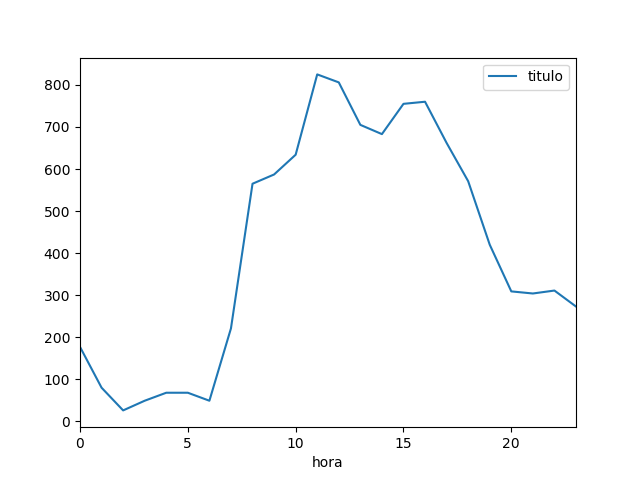

In [16]:
data[['titulo','hora']].groupby('hora').count().plot(kind='line')

## Regression

## cross validation


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn import metrics

count = CountVectorizer(min_df=5, ngram_range = (1,3)).fit(data['titulo'])
x_train_vectorizedCV = count.transform(data['titulo'])

model = LinearRegression()
print(cross_val_score(model, x_train_vectorizedCV, data['visitas'],cv = 10))

[-3.69939042 -3.43880532 -2.32287233 -1.97443864 -2.90192169 -2.48495606
 -2.95448799 -3.95832388 -5.22591694 -4.89283957]


## Dividir data set

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['titulo'],data['visitas'], random_state=0)

## vectorizar Simple

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

count = CountVectorizer(min_df=5, ngram_range = (1,3)).fit(x_train)
x_train_vectorizedCV = count.transform(x_train)

## vectorizar word2vec

In [19]:
len(data['titulo'])

9908

In [22]:
train = []
for i, line in enumerate(x_train):
    train.append(gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(line), [i]))


w2v = gensim.models.Word2Vec(x_train, min_count=5, window = 6)
d2v = gensim.models.doc2vec.Doc2Vec(train, min_count=5)

<IPython.core.display.Javascript object>


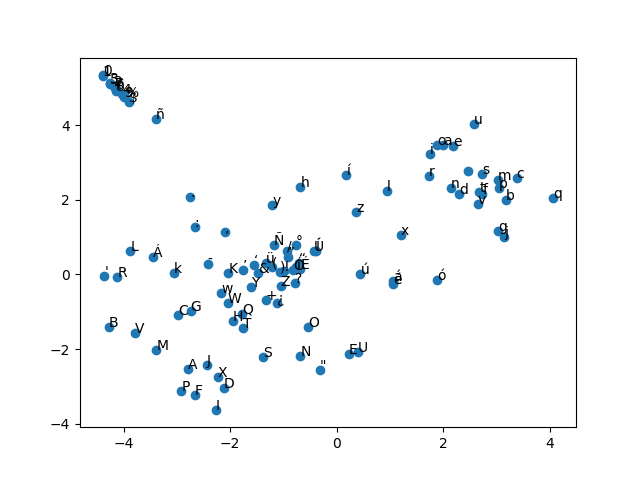

In [23]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

vocab = list(w2v.wv.vocab)
X = w2v[vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
df = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(vocab)],
               axis=1)

df.columns = ['x', 'y', 'word']
ax.scatter(df['x'], df['y'])
for i, txt in enumerate(df['word']):
    ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]))

In [83]:
extra = count.fit_transform(x_train)
count.vocabulary_

{u'igual': 2803,
 u'en laja': 2102,
 u'fuera': 2543,
 u'de que': 1443,
 u'gravedad': 2642,
 u'la \xfaltima': 3154,
 u'fin': 2473,
 u'gole\xf3': 2617,
 u'revel\xf3 el': 4554,
 u'abbott': 75,
 u'de millones': 1397,
 u'pacientes': 3796,
 u'sitio': 4825,
 u'prisi\xf3n preventiva': 4226,
 u'ir\xe1': 2935,
 u'incautan': 2824,
 u'pablo guede': 3795,
 u'encontrado': 2225,
 u'jupp heynckes': 3008,
 u'un gol': 5158,
 u'afirma': 166,
 u'hombre muere': 2749,
 u'participaci\xf3n de': 3879,
 u'bien': 505,
 u'detenido por': 1718,
 u'sorteo': 4856,
 u'en penco': 2140,
 u'financiamiento': 2482,
 u'tienen': 5007,
 u'hombre acusado': 2743,
 u'en dalcahue': 2042,
 u'de joven': 1328,
 u'semana en': 4745,
 u'chile no': 743,
 u'comunero': 863,
 u'corea del norte': 1009,
 u'filtraci\xf3n': 2472,
 u'campa\xf1a para': 605,
 u'alcalde de r\xedo': 207,
 u'de san': 1462,
 u'de m\xe1s': 1404,
 u'perdi\xf3': 3961,
 u'rompe': 4606,
 u'enero': 2239,
 u'pel\xedcula': 3944,
 u'rossi': 4610,
 u'alemania': 223,
 u'crear':

In [24]:
w2v

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7431 samples in 0.168s...
[t-SNE] Computed neighbors for 7431 samples in 29.127s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7431
[t-SNE] Computed conditional probabilities for sample 2000 / 7431
[t-SNE] Computed conditional probabilities for sample 3000 / 7431
[t-SNE] Computed conditional probabilities for sample 4000 / 7431
[t-SNE] Computed conditional probabilities for sample 5000 / 7431
[t-SNE] Computed conditional probabilities for sample 6000 / 7431
[t-SNE] Computed conditional probabilities for sample 7000 / 7431
[t-SNE] Computed conditional probabilities for sample 7431 / 7431
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.423347
[t-SNE] Error after 1000 iterations: 2.877815


<IPython.core.display.Javascript object>


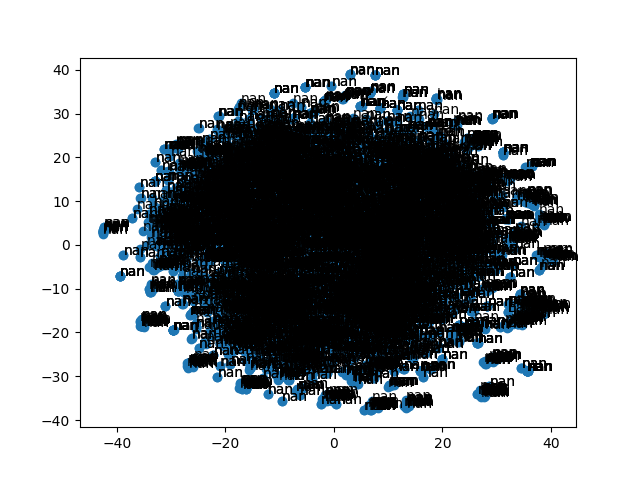

In [27]:
#import lda
#lda_model = lda.LDA(n_topics=20, n_iter=200)
#X_topics = lda_model.fit_transform(x_train_vectorizedCV)

from sklearn.decomposition import TruncatedSVD

X_reduced = TruncatedSVD(n_components=500, random_state=0).fit_transform(x_train_vectorizedCV)


tsne = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
X_tsne = tsne.fit_transform(X_reduced)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
df = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(vocab)],
               axis=1)

df.columns = ['x', 'y', 'word']
ax.scatter(df['x'], df['y'])
for i, txt in enumerate(df['word']):
    ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]))

Populating the interactive namespace from numpy and matplotlib


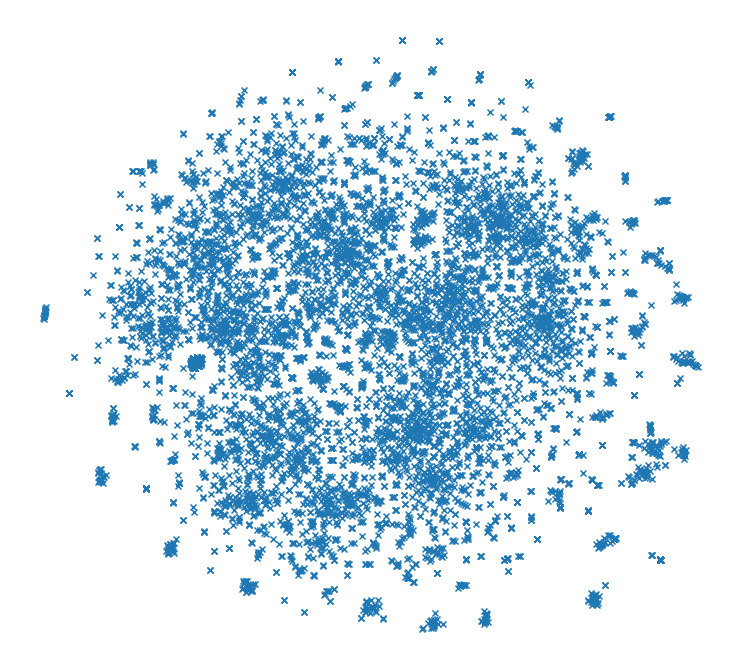

In [31]:
%pylab inline
newsgroups = data['cat']

fig = plt.figure(figsize=(10, 10))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_tsne[:, 0], X_tsne[:, 1],
        c=newsgroups.target, marker="x")

### Modelo lineal

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression().fit(x_train_vectorizedCV, y_train)
model_test = model.predict(count.transform(x_test))


print(metrics.r2_score(y_test, model_test))

-1.71223801392


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data['titulo'],data['visitas'], random_state=0)


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

vect = TfidfVectorizer(min_df=5, ngram_range = (1,3)).fit(x_train)
x_train_tfivectorized = vect.transform(x_train)

count = CountVectorizer(min_df=5, ngram_range = (1,3)).fit(x_train)
x_train_vectorized = count.transform(x_train)

SVD = TruncatedSVD()
TT = Normalizer(copy=False)
lsa = make_pipeline(SVD, TT)

X = lsa.fit_transform(x_train_tfivectorized)
len(count.get_feature_names())

In [86]:
pd.unique(data['visitas'])

array([   515.,   4713.,  18073., ...,  15694.,   7000.,  67252.])

In [38]:
model.predict(count.transform(['Cómo las startups en salud pueden apoyar a la organización hospitalaria']))

array([ 20014.20893711])

In [39]:
pickling_on = open("regression","wb")
pickle.dump(model, pickling_on)
pickling_on.close()

pickling_on2 = open("vectorizador","wb")
pickle.dump(count, pickling_on2)
pickling_on2.close()


In [40]:
model.predict(count.transform(['hola jamon con queso']))

array([ 6487.80937986])